# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. `Pandas` и `Seaborn`

При возникновении сложностей, связанных с Питоном и библиотеками, посмотрите материалы видео-курса <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>. Если не помогло, задайте вопрос по заданию.

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb. 
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 4 балла
* Задача 2 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 5 баллов
* Задача 4 &mdash; 3 балла
* Задача 5 &mdash; 8 баллов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие. Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv` со следующими полями:
* `school` &mdash; номер школы;
* `test_score` &mdash; результат одного ученика из этой школы;
* `number_of_students` &mdash; кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

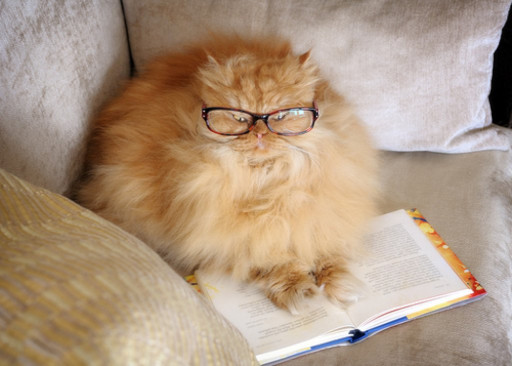

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

*Подсказка.* Это можно сделать с помощью методов  <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [2]:
df = pd.read_csv('./data/cat_exam_data.csv', sep=',')
df.head()

school  test_score  number_of_students
0      26        39.0                 965
1      54        64.0                1483
2     356        64.0                1055
3     108        68.0                1806
4     298        78.0                 971

Проверьте, что в данных нет пропусков (`NaN`). Если они есть:
* проверьте в каком столбце;
* удалите их.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [3]:
df.dropna(how='any')  # Удаление всех строк с пропусками
# df.isna()

school  test_score  number_of_students
0           26        39.0                 965
1           54        64.0                1483
2          356        64.0                1055
3          108        68.0                1806
4          298        78.0                 971
...        ...         ...                 ...
501557      52        65.0                1361
501558     412        37.0                1032
501559     165        80.0                 974
501560     426        47.0                 899
501561      76        50.0                 872

[501358 rows x 3 columns]

Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции.

In [4]:
df.describe()

school     test_score  number_of_students
count  501562.000000  501358.000000       501562.000000
mean      250.095661      51.681788         1088.868830
std       144.428841      14.179981          281.022934
min         0.000000       0.000000          156.000000
25%       125.000000      42.000000          890.000000
50%       250.000000      52.000000         1079.000000
75%       377.000000      61.000000         1285.000000
max       499.000000     100.000000         1806.000000

Отдельного внимания заслуживает среднее. Какими способами его можно посчитать? Произведите вычисления и *подробно* проинтерпретируйте результаты. Что стоит публиковать в официальной статистике?

Среднее можно считать по-разному: как среднее арифметическое, 
среднее по медиане или же значение, которое приимается чаще всего.
В данном случае есть осмысленно посчитать среднее фрифметическое 
по test_score и numver_of_students, 
среднее же по номеру школ - это что-то странное и не понятно зачем нужно.


In [5]:
print(f"медиана по результатам теста : {df['test_score'].median()}")
print(f"среднее арифметическое по результатам теста : {df['test_score'].mean()}")

print(f"медиана по количеству учеников : {df['number_of_students'].median()}")
print(f"среднее арифметическое по количеству учеников : {df['number_of_students'].mean()}")

медиана по результатам теста : 52.0
среднее арифметическое по результатам теста : 51.68178826307748
медиана по количеству учеников : 1079.0
среднее арифметическое по количеству учеников : 1088.8688297757806


Значения медианы и среднего арифметического в обоих случаях довольно близки (даже равны в пределах одного процента), что говорит об отсутствии сильных выбросов.

Посчитайте сколько котиков получили 100 баллов.

In [6]:
len(df[df['test_score'] == 100])

51

Выведите подробную информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.
Отсортируйте эти школы по количеству стобалльников.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [7]:
high_results = df[df['test_score'] == 100]

high_results = high_results.copy()

high_results['size'] = high_results.groupby('school')['test_score'].transform(len)
high_results['size'] = high_results[['size']].astype(int)
high_results = high_results.sort_values(by='size', ascending=False)
high_results['school'].unique()
high_results

school  test_score  number_of_students  size
353683     486       100.0                 800     2
385115     486       100.0                 800     2
21895      283       100.0                 823     1
360636     351       100.0                1224     1
247735      42       100.0                 650     1
252188     463       100.0                 809     1
258898     111       100.0                1168     1
275504     451       100.0                1077     1
285859     101       100.0                 571     1
325031     414       100.0                1134     1
327329      82       100.0                 555     1
330070     412       100.0                1032     1
359380      18       100.0                 715     1
374599     357       100.0                1003     1
233042     471       100.0                 960     1
394144     395       100.0                 436     1
400571     113       100.0                 939     1
414576      90       100.0                1244     1
418698     346       100.0                 913     1
424645     342       100.0                 920     1
449535     195       100.0                1035     1
462207     436       100.0                 878     1
476622     120       100.0                1334     1
477152     483       100.0                1222     1
239004      96       100.0                 943     1
215465     226       100.0                 923     1
36760      233       100.0                1140     1
121358     359       100.0                 895     1
43217      302       100.0                1517     1
49028      394       100.0                1079     1
53181      114       100.0                1231     1
55143      105       100.0                1164     1
56951       91       100.0                 749     1
58262       14       100.0                 777     1
75956      184       100.0                 742     1
81871      328       100.0                 789     1
87805      229       100.0                1244     1
114316     498       100.0                 796     1
123963     429       100.0                 768     1
212584     282       100.0                1505     1
124434     206       100.0                 973     1
127306     425       100.0                 929     1
128606     303       100.0                 701     1
139815     232       100.0                 999     1
160682       4       100.0                1015     1
169928     261       100.0                 983     1
190695      69       100.0                1012     1
195290      98       100.0                 775     1
197930     256       100.0                 996     1
201916     315       100.0                 580     1
486901     403       100.0                1317     1

Посчитайте средний результат каждой из школ и посмотрите на результат. Рассматриваем все школы, не только со стобальниками.

*Подсказка.* Может помочь метод <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [8]:
df.groupby(['school']).mean()['test_score']

school
0      52.294258
1      52.028950
2      51.751451
3      51.566265
4      51.025641
         ...    
495    50.933275
496    51.146402
497    51.141228
498    51.709799
499    52.413738
Name: test_score, Length: 500, dtype: float64

Отсортируйте школы по среднему результату.

In [9]:
avg_score_at_schools = df.groupby(['school']).mean().sort_values('test_score', ascending=False)
avg_score_at_schools

test_score  number_of_students
school                                
57       53.341682                 560
124      52.993311                 598
263      52.982063                 669
82       52.981982                 555
366      52.970207                 773
...            ...                 ...
194      50.406977                 774
471      50.362500                 960
486      50.325000                 800
211      50.248571                 351
353      50.050595                 336

[500 rows x 2 columns]

Посмотрите на топ 10 лучших результатов.

In [10]:
print(f"среднее число учеников в 10 лучших школах: {avg_score_at_schools[:10]['number_of_students'].mean()}")
avg_score_at_schools[:10]

среднее число учеников в 10 лучших школах: 678.8


test_score  number_of_students
school                                
57       53.341682                 560
124      52.993311                 598
263      52.982063                 669
82       52.981982                 555
366      52.970207                 773
465      52.957555                1179
169      52.932401                 858
449      52.910364                 357
477      52.898515                 808
464      52.865429                 431

**Вывод:** Средние результаты по школам довольно близки (равны в пределах 5-6 процентов). В 47 школах ровно один человек набрал 100 баллов и в двух школах ровно по два человека набрали по 100 баллов.

Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим. Посмотрите теперь на 10 худших школ.

In [11]:
print(f"среднее число учеников в 10 школах с наименьшим средним баллом : {avg_score_at_schools[-10:]['number_of_students'].mean()}")
avg_score_at_schools[-10:]

среднее число учеников в 10 школах с наименьшим средним баллом : 760.7


test_score  number_of_students
school                                
383      50.716981                 636
264      50.702906                 929
48       50.690293                 649
156      50.641354                1093
394      50.461538                1079
194      50.406977                 774
471      50.362500                 960
486      50.325000                 800
211      50.248571                 351
353      50.050595                 336

**Вывод:** И правда, можно заметить, что в школах с большим числом учеников средний балл по тесту нижу .

Постройте график зависимости среднего результата ЕКЭ от количества учеников.

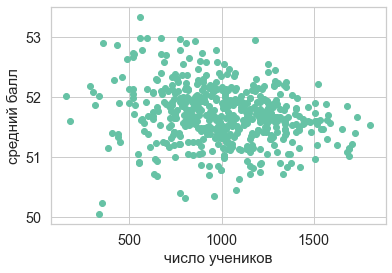

In [12]:
plt.figure()
plt.scatter(avg_score_at_schools['number_of_students'], avg_score_at_schools['test_score'])
plt.xlabel(r'число учеников', fontsize=15)
plt.ylabel(r'средний балл', fontsize=15)
plt.show()

**Вывод:** Явного превосходства школ с большим/меньшим числом учеников нет.

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы, получив тем самым два датасета. Будем считать, что школа небольшая, если в ней не более 1000 учеников.

In [13]:
separator = 1000
small_schools = avg_score_at_schools[avg_score_at_schools['number_of_students'] <= separator]
big_schools = avg_score_at_schools[avg_score_at_schools['number_of_students'] > separator]

In [14]:
small_schools.head()

test_score  number_of_students
school                                
57       53.341682                 560
124      52.993311                 598
263      52.982063                 669
82       52.981982                 555
366      52.970207                 773

In [15]:
big_schools.head()

test_score  number_of_students
school                                
465      52.957555                1179
444      52.562253                1012
28       52.553429                1254
168      52.464423                1040
456      52.453840                1289

Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` &mdash; число бинов гистограммы;
* `alpha=0.5` &mdash; прозрачность бинов.

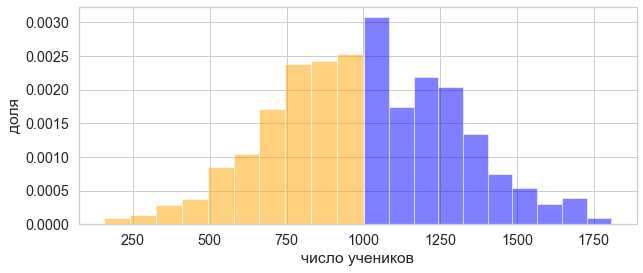

In [16]:
plt.figure(figsize=(10, 4))

sample = small_schools['number_of_students']


plt.hist(
    sample, 
    bins=10,
    density = True,
    alpha=0.5,
    color='orange'
)

sample = big_schools['number_of_students']

plt.hist(
    sample, 
    bins=10,
    density = True,
    alpha=0.5,
    color='blue'
)

plt.xlabel('число учеников')
plt.ylabel('доля')

plt.show()

**Вывод:** Можно пронаблюдать что-то похожее на нормальное распределение: число учеников имеет нормальное распределение по школам.

---

### Задача 2

Задача заключается в работе с данными о трендах на <a target="_blank" href="https://www.youtube.com/">YouTube</a>. В этом вам поможет библиотека `seaborn`, которая была рассмотрена на одной из последних лекций.

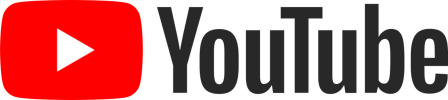


<b>1. Подготовка данных</b>

Скачайте файл `RUvideos_short.csv` с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на <a target="_blank" href="https://www.kaggle.com/datasnaek/youtube-new#RUvideos.csv">kaggle</a>.

Прочитайте данные с помощью библиотеки `pandas` и напечатайте начало таблицы. В колонке `trending_date` записана дата. При чтении таблицы распознайте ее.

*Замечание. Часто считывание дат &mdash; головная боль аналитика.*

In [17]:
from datetime import datetime

dateparser = lambda date_string: datetime.strptime(date_string, "%y.%d.%m")

df = pd.read_csv('./data/RUvideos_short.csv', sep=','
                 , parse_dates = ['trending_date']
                 , date_parser=dateparser)

df.head()

video_id trending_date                                  title  \
0  gDuslQ9avLc    2017-11-14        Захар и Полина учатся экономить   
1  AOCJIFEA_jE    2017-11-14       Биржа Мемов #29. Большой выпуск   
2  VAWNQDgwwOM    2017-11-14           ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ   
3  gknkFwKQfHg    2017-11-14             Сочная кесадилья с курицей   
4  3sYvZcwzZr8    2017-11-14  КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ   

  channel_title  category_id              publish_time  \
0     Т—Ж БОГАЧ           22  2017-11-13T09:09:31.000Z   
1  Druzhko Show           22  2017-11-13T17:32:11.000Z   
2          Юлик           24  2017-11-13T16:11:31.000Z   
3      Hochland           22  2017-11-13T06:51:10.000Z   
4      Совергон           24  2017-11-13T16:52:36.000Z   

                                                tags   views  likes  dislikes  \
0  захар и полина|"учимся экономить"|"копить день...   62408    334       190   
1  биржа мемов|"лев шагинян"|"мемы"|"пикчи"|"друж...  330043  43841      2244   
2  юмор|"комедия"|"влог"|"блог"|"смешно"|"смешное...  424596  49854       714   
3  хохланд|"сыр"|"рецепты"|"как приготовить"|"вку...  112851   3566       122   
4  Совергон|"Sovergon"|"клипы"|"родители"|"школа"...  243469  36216       631   

   comment_count                                  thumbnail_link  \
0             50  https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg   
1           2977  https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg   
2           2944  https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg   
3             80  https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg   
4           1692  https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Знакомьтесь, это Захар и Полина. Вместе с ними...  
1  В 29 выпуске Дружко Шоу Сергей сказал, что Бир...  
2  http://kapitany.ru/!Yulik.cap - Факультет #Кап...  
3            *** как готовить ресторанные блюда дома  
4  ❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...

В таблице много лишних данных. Оставьте следующие столбцы:
* `trending_date` &mdash; дата в формате год-день-месяц;
* `category_id` &mdash; категория видео, названия приведены в файле `RU_category_id.json`;
* `views` &mdash; количество просмотров видео;
* `likes` &mdash; количество лайков;
* `dislikes` &mdash; количество дислайков;
* `comment_count` &mdash; количество комментариев.

Из даты оставьте только день. Для этого можно пройтись циклом по всем датам и взять поле `day` у объекта даты. Напечатайте начало таблицы.

In [18]:
df['trending_date'] = df['trending_date'].apply((lambda x: x.day))
df[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]

df = df.rename(columns = {"trending_date": "day"})
df.head()

video_id  day                                  title channel_title  \
0  gDuslQ9avLc   14        Захар и Полина учатся экономить     Т—Ж БОГАЧ   
1  AOCJIFEA_jE   14       Биржа Мемов #29. Большой выпуск  Druzhko Show   
2  VAWNQDgwwOM   14           ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ          Юлик   
3  gknkFwKQfHg   14             Сочная кесадилья с курицей      Hochland   
4  3sYvZcwzZr8   14  КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ      Совергон   

   category_id              publish_time  \
0           22  2017-11-13T09:09:31.000Z   
1           22  2017-11-13T17:32:11.000Z   
2           24  2017-11-13T16:11:31.000Z   
3           22  2017-11-13T06:51:10.000Z   
4           24  2017-11-13T16:52:36.000Z   

                                                tags   views  likes  dislikes  \
0  захар и полина|"учимся экономить"|"копить день...   62408    334       190   
1  биржа мемов|"лев шагинян"|"мемы"|"пикчи"|"друж...  330043  43841      2244   
2  юмор|"комедия"|"влог"|"блог"|"смешно"|"смешное...  424596  49854       714   
3  хохланд|"сыр"|"рецепты"|"как приготовить"|"вку...  112851   3566       122   
4  Совергон|"Sovergon"|"клипы"|"родители"|"школа"...  243469  36216       631   

   comment_count                                  thumbnail_link  \
0             50  https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg   
1           2977  https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg   
2           2944  https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg   
3             80  https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg   
4           1692  https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Знакомьтесь, это Захар и Полина. Вместе с ними...  
1  В 29 выпуске Дружко Шоу Сергей сказал, что Бир...  
2  http://kapitany.ru/!Yulik.cap - Факультет #Кап...  
3            *** как готовить ресторанные блюда дома  
4  ❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...

<b>2. Некоторая визуализация</b>

Постройте ящики с усами на каждый день по количеству просмотров. Насколько хороший получился график?

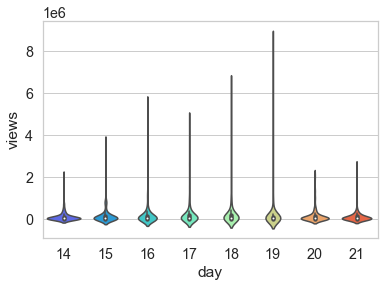

In [19]:
sns.violinplot(x="day", y="views", data=df, palette='rainbow');

График получился неудачный, так как в каждый из дней число просмотров под роликами принимает значения в очень большом диапазоне, из-за чего график не очень наглядный.

Исправьте этот недостаток, установив некоторое значение. 

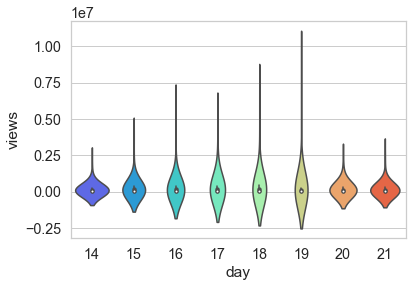

In [20]:
sns.violinplot(x="day", y="views", data=df, palette='rainbow', bw = 2);

Постройте `jointplot` по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной. Насколько информативен такой график?

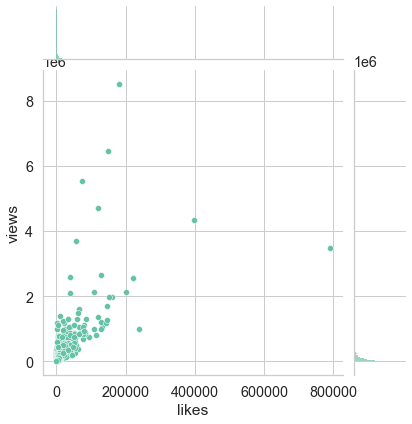

In [21]:
sns.jointplot(x='likes', y='views', data=df)

Исправьте этот недостаток.

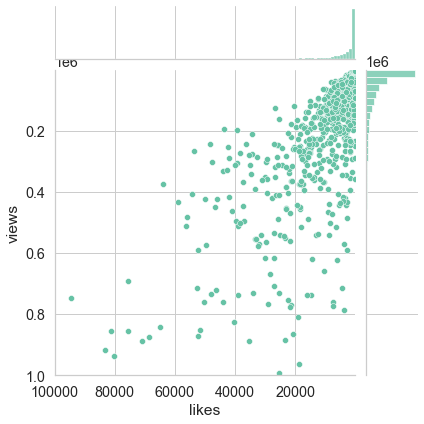

In [22]:
sns.jointplot(x='likes', y='views', data=df, xlim=100000, ylim=1000000)


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 3

<a target="_blank" href="https://www.netflix.com">Netflix</a> за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


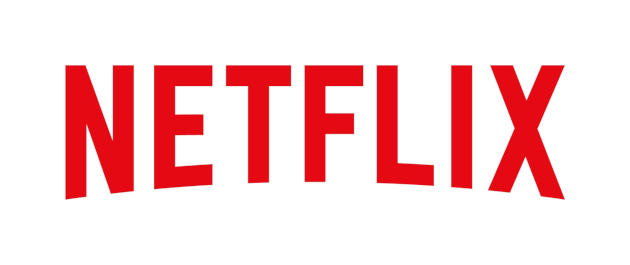

Описание признаков:
* `title` &mdash; название шоу;
* `rating` &mdash; рейтинг шоу. Например: G, PG, TV-14, TV-MA;
* `ratingLevel` &mdash; описание рейтинговой группы и особенностей шоу;
* `release year` &mdash; год выпуска шоу;
* `user rating score` &mdash; оценка пользователей.


Загрузите данные, выполнив код ниже.

In [23]:
data = pd.read_csv("./data/netflix_data.csv", encoding='cp437')

del data['ratingDescription'], data['user rating size']

data

title rating  \
0               White Chicks  PG-13   
1        Lucky Number Slevin      R   
2             Grey's Anatomy  TV-14   
3               Prison Break  TV-14   
4      How I Met Your Mother  TV-PG   
..                       ...    ...   
995                  The BFG     PG   
996  The Secret Life of Pets     PG   
997         Precious Puppies   TV-G   
998              Beary Tales   TV-G   
999          Growing Up Wild      G   

                                           ratingLevel  release year  \
0    crude and sexual humor, language and some drug...          2004   
1    strong violence, sexual content and adult lang...          2006   
2    Parents strongly cautioned. May be unsuitable ...          2016   
3    Parents strongly cautioned. May be unsuitable ...          2008   
4    Parental guidance suggested. May not be suitab...          2014   
..                                                 ...           ...   
995  for action/peril, some scary moments and brief...          2016   
996                     for action and some rude humor          2016   
997                             Suitable for all ages.          2003   
998                             Suitable for all ages.          2013   
999                                                NaN          2016   

     user rating score  
0                 82.0  
1                  NaN  
2                 98.0  
3                 98.0  
4                 94.0  
..                 ...  
995               97.0  
996                NaN  
997                NaN  
998                NaN  
999               80.0  

[1000 rows x 5 columns]

Удалите из данных дупликаты. Сколько объектов удалено?

In [24]:
print(f"{len(data) - len(data.drop_duplicates())} объектов удалено.")
data = data.drop_duplicates()
data

500 объектов удалено.


title rating  \
0                 White Chicks  PG-13   
1          Lucky Number Slevin      R   
2               Grey's Anatomy  TV-14   
3                 Prison Break  TV-14   
4        How I Met Your Mother  TV-PG   
..                         ...    ...   
989            Russell Madness     PG   
993  Wiener Dog Internationals      G   
994                   Pup Star      G   
997           Precious Puppies   TV-G   
998                Beary Tales   TV-G   

                                           ratingLevel  release year  \
0    crude and sexual humor, language and some drug...          2004   
1    strong violence, sexual content and adult lang...          2006   
2    Parents strongly cautioned. May be unsuitable ...          2016   
3    Parents strongly cautioned. May be unsuitable ...          2008   
4    Parental guidance suggested. May not be suitab...          2014   
..                                                 ...           ...   
989                  some rude humor and sports action          2015   
993          General Audiences. Suitable for all ages.          2015   
994          General Audiences. Suitable for all ages.          2016   
997                             Suitable for all ages.          2003   
998                             Suitable for all ages.          2013   

     user rating score  
0                 82.0  
1                  NaN  
2                 98.0  
3                 98.0  
4                 94.0  
..                 ...  
989                NaN  
993                NaN  
994                NaN  
997                NaN  
998                NaN  

[500 rows x 5 columns]

Сколько объектов осталось?

In [25]:
print(f"{len(data)} объектов осталось.")

500 объектов осталось.


Есть ли в данных пропуски?

Если да, то при дальнейшем анализе подумайте, как их корректнее обработать. Учтите, что многие методы умеют работать с пропусками.

In [26]:
data.isna()

title  rating  ratingLevel  release year  user rating score
0    False   False        False         False              False
1    False   False        False         False               True
2    False   False        False         False              False
3    False   False        False         False              False
4    False   False        False         False              False
..     ...     ...          ...           ...                ...
989  False   False        False         False               True
993  False   False        False         False               True
994  False   False        False         False               True
997  False   False        False         False               True
998  False   False        False         False               True

[500 rows x 5 columns]

Да, пропуски есть.

Сколько рейтинговых групп представлено в данных?

In [27]:
print(f"{len(data['ratingLevel'].unique())} рейтинговых групп представлено в данных")

100 рейтинговых групп представлено в данных


Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

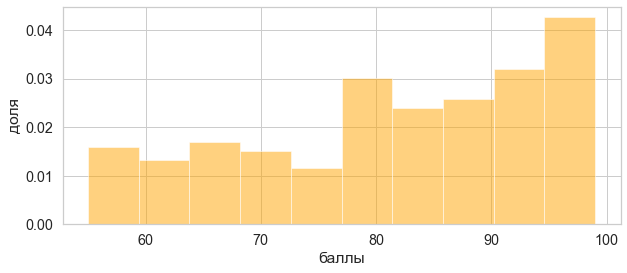

In [28]:
sample = data['user rating score']
sample

plt.figure(figsize=(10, 4))


plt.hist(
    sample, 
    bins=10,
    density = True,
    alpha=0.5,
    color='orange'
)


plt.xlabel('баллы')
plt.ylabel('доля')

plt.show()

In [29]:
data['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

Пользователи чаще ставят высокие оценки: 80 - 100 баллов

**Вывод:** Пользователи чаще ставят высокие оценки, реже - низкие. Ниже 55 баллов нет. Среднее значение - 81 балл.

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [30]:
data['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

In [31]:
data['user rating score'].median()

83.5

Медиана и среднее почти равны в пределах 3 процентов.

**Ответ:** Да, медиана и среднее могут сильно отличаться. Например, пусть есть оценки для $n = 2k + 1$ фильмов такие, что первые k фильмов имеют очень низкие оценки, а остальные k + 1 оценка будут очень выскомими, тогда медиана будет примать значение, которое может быть до 2 раза больше среднего.

В какие годы были запущены шоу, представленные в датасете?

In [32]:
years = data['release year'].unique()
years.sort()
years

array([1940, 1976, 1978, 1982, 1986, 1987, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

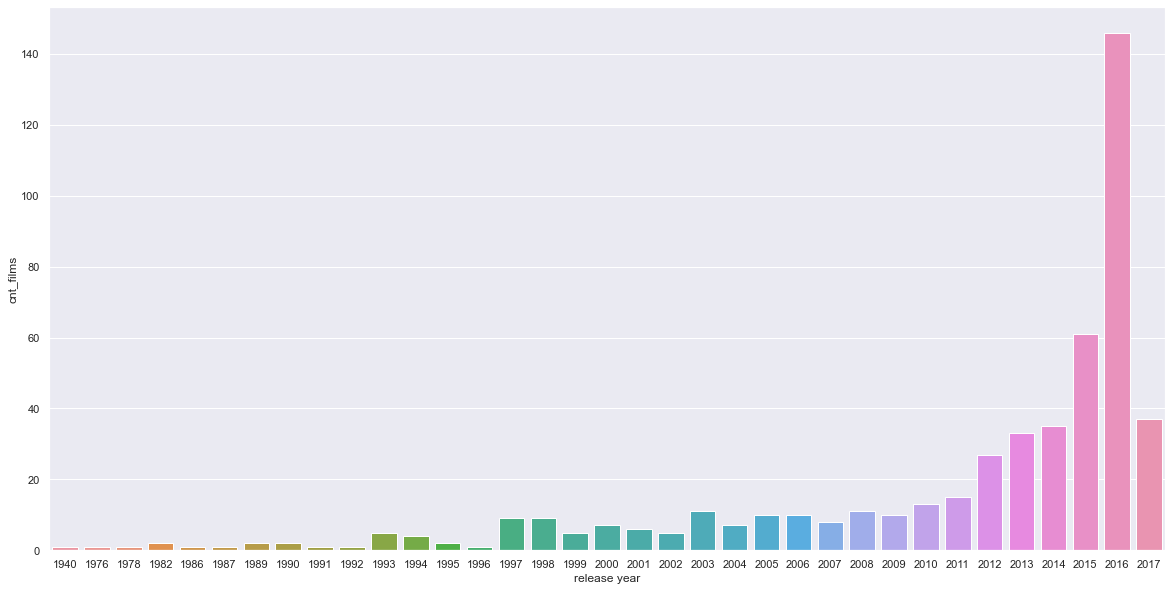

In [69]:
data['cnt_films'] = data.groupby('release year')['title'].transform(len)
data

info = data[['release year', 'cnt_films']]
sns.barplot(x='release year', y='cnt_films', data=info)

sns.set(rc={'figure.figsize':(20, 10)})

**Вывод:** На графике четко виден рост числа фильмов в год. Можно предположить, что рост числа фильмов в год - экспоненциальный. Выбросов нет.

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? "Успешнее" означает, что пользователи в среднем ставили более высокие оценки.
Ответить на этот вопрос вам поможет график, который вы построили выше.

In [34]:
avg_rating_score = data.groupby('release year')['user rating score'].mean()
print(f"средняя оценка фильмов за 2016 год: {round(avg_rating_score[2016], 1)}")
print(f"средняя оценка фильмов за 2017 год: {round(avg_rating_score[2017], 1)}")

средняя оценка фильмов за 2016 год: 84.3
средняя оценка фильмов за 2017 год: 88.1


**Вывод:** В 2017 году пользователи в среднем ставили немного более выскоие оценки, чем в 2016, но так как данные только до середины 2017 года больше ничего скзать нельзя.

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? [Подсказка](https://mipt-stats.gitlab.io/courses/ad_fivt/Jobs.jpg)

Постройтре самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

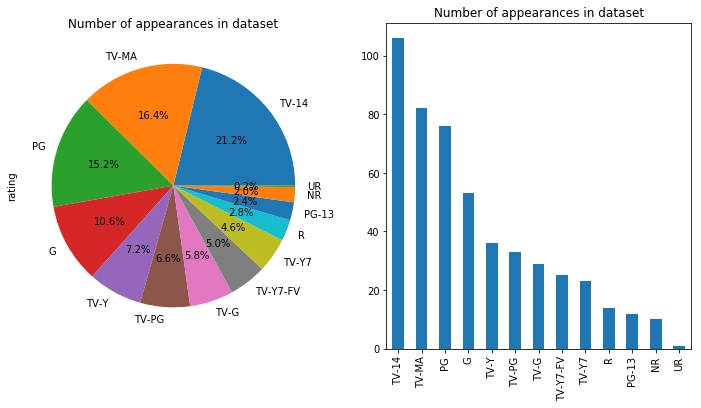

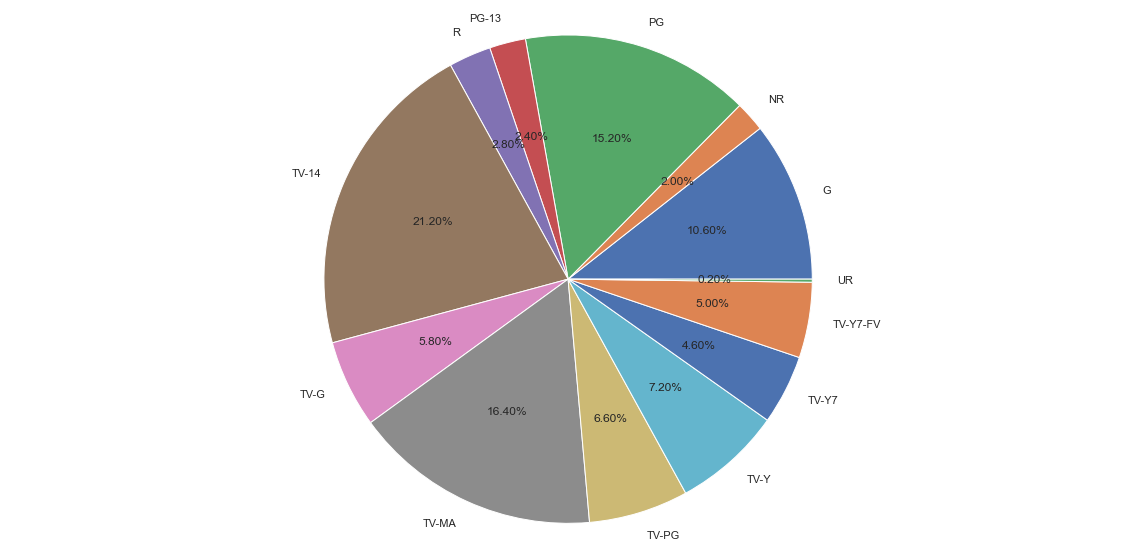

In [35]:
rating_cnt = pd.DataFrame(data.groupby('rating').size())

rating_cnt['rating'] = rating_cnt.index
len(rating_cnt)


fig1, ax1 = plt.subplots()
ax1.pie(rating_cnt[0], labels=rating_cnt['rating'], autopct='%1.2f%%')
ax1.axis('equal')

plt.show()

**Вывод:** Можно разделить rating на три группы по величине доли фильмов с этими рейтингами в прокате. Первая группа с самыми популярными рейтингами: TV-MA, TV-14, PG, G. Вторая по популярности группа: TV-PG, TV-Y, TV-Y7, TV-Y7-FV, TV-G. И третья - оставшиеся.

Составьте топ-13 самых высоко оцененных шоу. Выберите из данного топа шоу, которое вам наиболее нравится. Обозначим это шоу N.
Ответьте на следующие вопросы.
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

In [36]:
best = data.sort_values('user rating score', ascending=False)[:13]
best

title rating  \
41            13 Reasons Why  TV-MA   
350                     Lost  TV-14   
10          Once Upon a Time  TV-PG   
64                   Friends  TV-14   
72   Orange Is the New Black  TV-MA   
27                 The Flash  TV-PG   
25        Marvel's Iron Fist  TV-MA   
88              Finding Dory     PG   
62                Family Guy  TV-MA   
63            Criminal Minds  TV-14   
3               Prison Break  TV-14   
2             Grey's Anatomy  TV-14   
8           The Walking Dead  TV-MA   

                                           ratingLevel  release year  \
41   For mature audiences.  May not be suitable for...          2017   
350  Parents strongly cautioned. May be unsuitable ...          2010   
10   Parental guidance suggested. May not be suitab...          2016   
64   Parents strongly cautioned. May be unsuitable ...          2003   
72   For mature audiences.  May not be suitable for...          2016   
27   Parental guidance suggested. May not be suitab...          2016   
25                                                 NaN          2017   
88                              mild thematic elements          2016   
62   For mature audiences.  May not be suitable for...          2015   
63   Parents strongly cautioned. May be unsuitable ...          2016   
3    Parents strongly cautioned. May be unsuitable ...          2008   
2    Parents strongly cautioned. May be unsuitable ...          2016   
8    For mature audiences.  May not be suitable for...          2015   

     user rating score  cnt_films  
41                99.0         37  
350               98.0         13  
10                98.0        146  
64                98.0         11  
72                98.0        146  
27                98.0        146  
25                98.0         37  
88                98.0        146  
62                98.0         61  
63                98.0        146  
3                 98.0         11  
2                 98.0        146  
8                 98.0         61

In [37]:
N = "13 Reasons Why"
pattern = best[best['title'] == N]['ratingLevel'][41]
pattern
min_score = data[data['ratingLevel'] == pattern]['user rating score'].min()
data[(data['ratingLevel'] == pattern) & (data['user rating score'] == min_score)]['title']

380    Bitten
Name: title, dtype: object

Bitten - худшее шоу по оценкам в рейтинговой группе, к которой принадлежит N="13 Reasons Why"

In [38]:
year = best[best['title'] == N]['release year'][41]
len(data[data['release year'] == year])

37

37 шоу было выпущено в одном году с N="13 Reasons Why".

Ответьте на следующие вопросы, проанализировав `boxplot`-график.
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет, за которые есть данные? 
* Как менялись оценки пользователей с течением времени? Постройте `boxplot` для каждого десятилетия.

In [39]:
data = data.sort_values('release year')
min_year = data['release year'].min()
min_year
max_year = 2017

1

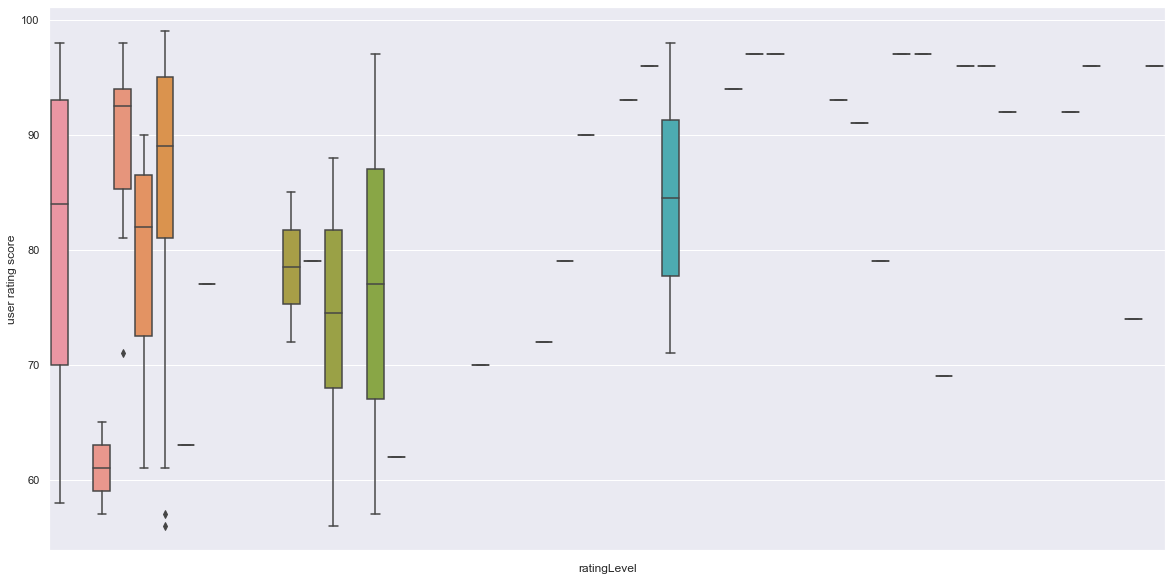

In [40]:
box = sns.boxplot(x='ratingLevel', y='user rating score', data=data[data['release year'] >= max_year - 5])
box.set(xticklabels=[])
1

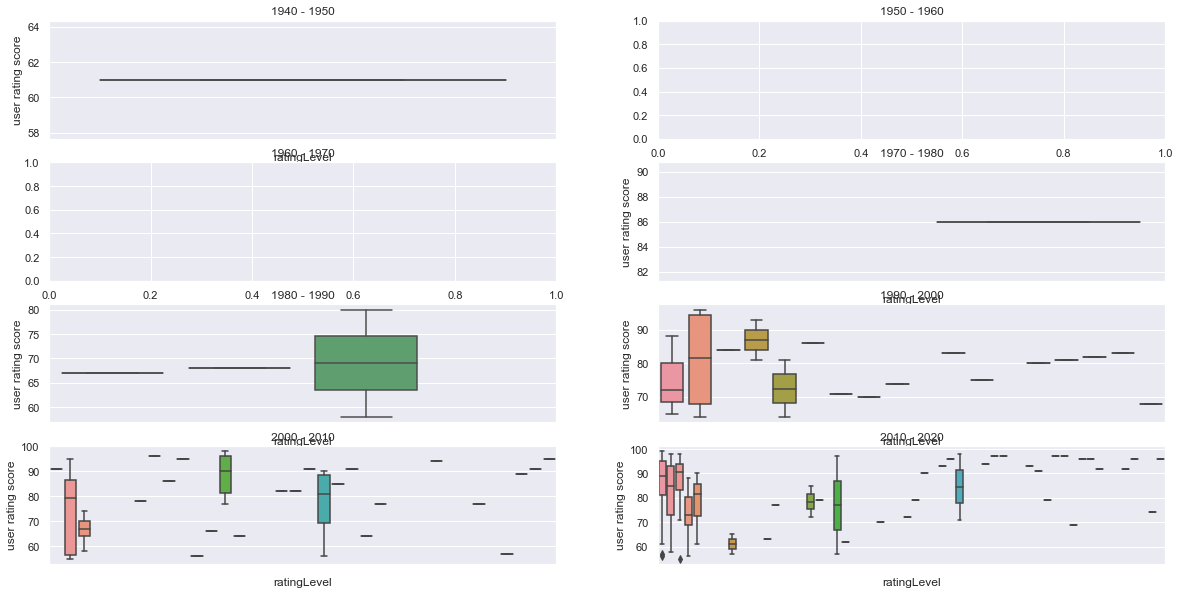

In [41]:
for i in range(1, 9):
    plt.subplot(4, 2, i)
    plt.title(f"{min_year + 10 * (i-1)} - {min_year + 10 * i}")
    try:
        box = sns.boxplot(x='ratingLevel'
                          , y='user rating score'
                          , data=data[
                              (data['release year'] >= min_year + 10 * (i-1))
                              & (data['release year'] < min_year + 10 * i)
                      ])
        
    except:
        pass
    box.set(xticklabels=[])


**Вывод:** Оценки пользователей увеличивались с каждым десятилетием. Оценок становилось больше.

---
### Задача 4

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле `RU_category_id.json`. Следующий код читает этот файл, извлекает из него необходимую информацию, и записывает в виде `pandas`-таблицы.

In [42]:
import json

with open('./data/RU_category_id.json') as json_file:
    json_data = json.load(json_file)
    
category = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    category = category.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
    
category['id'] = category['id'].astype(int)
category

id                  name
0    1      Film & Animation
1    2      Autos & Vehicles
2   10                 Music
3   15        Pets & Animals
4   17                Sports
5   18          Short Movies
6   19       Travel & Events
7   20                Gaming
8   21         Videoblogging
9   22        People & Blogs
10  23                Comedy
11  24         Entertainment
12  25       News & Politics
13  26         Howto & Style
14  27             Education
15  28  Science & Technology
16  30                Movies
17  31       Anime/Animation
18  32      Action/Adventure
19  33              Classics
20  34                Comedy
21  35           Documentary
22  36                 Drama
23  37                Family
24  38               Foreign
25  39                Horror
26  40        Sci-Fi/Fantasy
27  41              Thriller
28  42                Shorts
29  43                 Shows
30  44              Trailers

Добавьте к вашим данным имена категорий с помощью `pd.merge`.

In [43]:
new_df = df

In [44]:
new_df = new_df.merge(category, left_on='category_id', right_on='id', how='inner')
new_df.head()

video_id  day                                              title  \
0  gDuslQ9avLc   14                    Захар и Полина учатся экономить   
1  AOCJIFEA_jE   14                   Биржа Мемов #29. Большой выпуск   
2  gknkFwKQfHg   14                         Сочная кесадилья с курицей   
3  TZdNwUSgRHc   14  РПЦ незаконно строит храм, полиция смотрит как...   
4  ss0q7YJ8weU   14      5 антиЛАЙФХАКОВ без которых жизнь невозможна!   

                channel_title  category_id              publish_time  \
0                   Т—Ж БОГАЧ           22  2017-11-13T09:09:31.000Z   
1                Druzhko Show           22  2017-11-13T17:32:11.000Z   
2                    Hochland           22  2017-11-13T06:51:10.000Z   
3  Нет застройке без согласия           22  2017-11-13T06:29:09.000Z   
4                        DIPT           22  2017-11-13T15:49:05.000Z   

                                                tags   views  likes  dislikes  \
0  захар и полина|"учимся экономить"|"копить день...   62408    334       190   
1  биржа мемов|"лев шагинян"|"мемы"|"пикчи"|"друж...  330043  43841      2244   
2  хохланд|"сыр"|"рецепты"|"как приготовить"|"вку...  112851   3566       122   
3                                             [none]   97006   2259       330   
4  лайфхаки|"дипт"|"dipt"|"антилайфхаки"|"лайфхак...  148974   5434      5247   

   comment_count                                  thumbnail_link  \
0             50  https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg   
1           2977  https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg   
2             80  https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg   
3            887  https://i.ytimg.com/vi/TZdNwUSgRHc/default.jpg   
4           1612  https://i.ytimg.com/vi/ss0q7YJ8weU/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  id            name  
0  Знакомьтесь, это Захар и Полина. Вместе с ними...  22  People & Blogs  
1  В 29 выпуске Дружко Шоу Сергей сказал, что Бир...  22  People & Blogs  
2            *** как готовить ресторанные блюда дома  22  People & Blogs  
3  Строители нападают на муниципального депутата,...  22  People & Blogs  
4  Инвестируй -  https://binary-monster.com/ \nВс...  22  People & Blogs

Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощю функции `pivot_table`.

In [45]:
views = pd.pivot_table(new_df,
               index=["day"],
               columns=["name"],
               values=["views"],
               aggfunc=np.sum)
views

views                                                      \
name Autos & Vehicles     Comedy Education Entertainment Film & Animation   
day                                                                         
14          1350890.0  2310887.0  139723.0     5010384.0         636616.0   
15          2076443.0  4152389.0   28850.0     5289490.0         931837.0   
16          2051608.0  4156893.0    6963.0     3373346.0        1160112.0   
17          1386676.0  3556025.0  146943.0    12299938.0        1820958.0   
18          1713087.0  3806238.0  256076.0     7519942.0        2725012.0   
19          1736740.0  3556578.0  310830.0     5877590.0        1075440.0   
20           962761.0  5648120.0  270585.0     8174020.0        2574276.0   
21          1421017.0  4627423.0  186909.0     4585563.0        2532978.0   

                                                                         \
name     Gaming Howto & Style      Music News & Politics People & Blogs   
day                                                                       
14     885597.0     2191619.0   733907.0       1010044.0      4740267.0   
15    1609621.0     1562421.0  1585619.0       1225112.0      4931179.0   
16    1583149.0      129763.0  4720464.0       1174092.0      4763680.0   
17     557074.0     1250164.0  9179397.0       1251367.0      5976118.0   
18     600307.0     1468139.0  6972429.0       1056007.0      5154219.0   
19     193316.0      156958.0  1329904.0       1028665.0      4353670.0   
20     851814.0     1402284.0  1527219.0        657263.0      4628820.0   
21     981217.0      350009.0   809274.0       1214178.0      6889111.0   

                                                                               
name Pets & Animals Science & Technology     Shows     Sports Travel & Events  
day                                                                            
14        2013597.0            2053694.0  951608.0   608587.0        104076.0  
15              NaN            6637302.0  656799.0  1181720.0        136549.0  
16         608073.0            6855094.0  548936.0  1193647.0          2271.0  
17         541708.0            2521015.0  609770.0   577087.0             NaN  
18          16179.0            8351102.0  808860.0    64261.0        253369.0  
19          12928.0            9396340.0       NaN   911646.0        406558.0  
20           8792.0             818570.0  491488.0   600913.0        186876.0  
21         164127.0             638900.0  164981.0   722192.0         26321.0

Визуализируйте таблицу с помощью `heatmap`. Для информативности поделите все числа на $10^6$.

Text(84.5, 0.5, 'Дни')

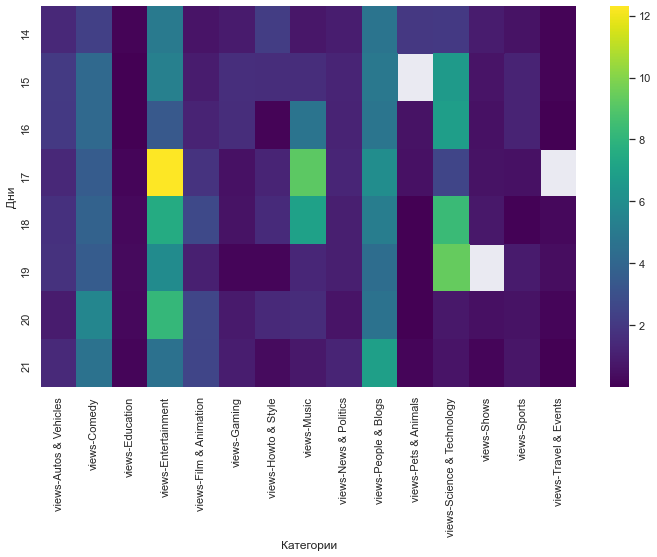

In [46]:
views = views.apply(lambda x: x/1000000)
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(views, cmap="viridis")
plt.xlabel('Категории')
plt.ylabel('Дни')
# sns.heatmap(data=new_df)

Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".

In [47]:
views = pd.pivot_table(new_df,
               index=["day"],
               columns=["name"],
               values=["views"],
               aggfunc=np.sum, 
               margins=True)

# views['views', 'Comedy']
views = views['views']
views.rename(index = {"All": "Всего просмотров"},
                                 inplace = True)
views.rename(columns = {"All": "Всего просмотров"},
                                 inplace = True)
views

name              Autos & Vehicles      Comedy  Education  Entertainment  \
day                                                                        
14                       1350890.0   2310887.0   139723.0      5010384.0   
15                       2076443.0   4152389.0    28850.0      5289490.0   
16                       2051608.0   4156893.0     6963.0      3373346.0   
17                       1386676.0   3556025.0   146943.0     12299938.0   
18                       1713087.0   3806238.0   256076.0      7519942.0   
19                       1736740.0   3556578.0   310830.0      5877590.0   
20                        962761.0   5648120.0   270585.0      8174020.0   
21                       1421017.0   4627423.0   186909.0      4585563.0   
Всего просмотров        12699222.0  31814553.0  1346879.0     52130273.0   

name              Film & Animation     Gaming  Howto & Style       Music  \
day                                                                        
14                        636616.0   885597.0      2191619.0    733907.0   
15                        931837.0  1609621.0      1562421.0   1585619.0   
16                       1160112.0  1583149.0       129763.0   4720464.0   
17                       1820958.0   557074.0      1250164.0   9179397.0   
18                       2725012.0   600307.0      1468139.0   6972429.0   
19                       1075440.0   193316.0       156958.0   1329904.0   
20                       2574276.0   851814.0      1402284.0   1527219.0   
21                       2532978.0   981217.0       350009.0    809274.0   
Всего просмотров        13457229.0  7262095.0      8511357.0  26858213.0   

name              News & Politics  People & Blogs  Pets & Animals  \
day                                                                 
14                      1010044.0       4740267.0       2013597.0   
15                      1225112.0       4931179.0             NaN   
16                      1174092.0       4763680.0        608073.0   
17                      1251367.0       5976118.0        541708.0   
18                      1056007.0       5154219.0         16179.0   
19                      1028665.0       4353670.0         12928.0   
20                       657263.0       4628820.0          8792.0   
21                      1214178.0       6889111.0        164127.0   
Всего просмотров        8616728.0      41437064.0       3365404.0   

name              Science & Technology      Shows     Sports  Travel & Events  \
day                                                                             
14                           2053694.0   951608.0   608587.0         104076.0   
15                           6637302.0   656799.0  1181720.0         136549.0   
16                           6855094.0   548936.0  1193647.0           2271.0   
17                           2521015.0   609770.0   577087.0              NaN   
18                           8351102.0   808860.0    64261.0         253369.0   
19                           9396340.0        NaN   911646.0         406558.0   
20                            818570.0   491488.0   600913.0         186876.0   
21                            638900.0   164981.0   722192.0          26321.0   
Всего просмотров            37272017.0  4232442.0  5860053.0        1116020.0   

name              Всего просмотров  
day                                 
14                        24741496  
15                        32005331  
16                        32328091  
17                        41674240  
18                        40765227  
19                        30347163  
20                        28803801  
21                        25314200  
Всего просмотров         255979549

В чем проблема с информативностью подобных таблиц? Исправьте это.

*Подсказка*: посмотрите на графики, которые вы построили ранее. 

Данные в таблице находятся в разнобой, было бы неплохо отсортировать по какому-нибудь признаку.

In [48]:
# views.sort_index()

**Вывод:** <...>

---

### Задача 5

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

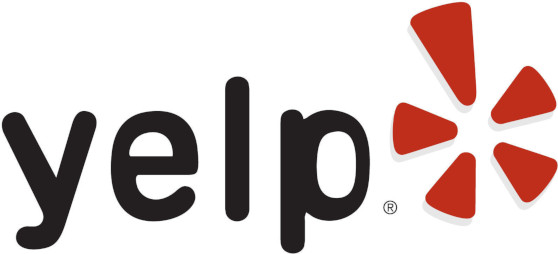

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [49]:
yelp_business = pd.read_csv('./data/yelp_business.csv', ',')
yelp_business.head()

Unnamed: 0             business_id                        name  \
0           0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"   
1           1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"   
2           2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"   
3           3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"   
4           4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"   

  neighborhood                           address            city state  \
0          NaN        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ   
1          NaN              "3101 Washington Rd"        McMurray    PA   
2          NaN          "6025 N 27th Ave, Ste 1"         Phoenix    AZ   
3          NaN  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ   
4          NaN                    "581 Howe Ave"  Cuyahoga Falls    OH   

  postal_code   latitude   longitude  is_open  \
0       85044  33.330690 -111.978599        1   
1       15317  40.291685  -80.104900        1   
2       85017  33.524903 -112.115310        1   
3       85282  33.383147 -111.964725        0   
4       44221  41.119535  -81.475690        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [50]:
yelp_business.groupby('city').size().sort_values(ascending=False)[:5]

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

Text(0, 0.5, 'longitude')

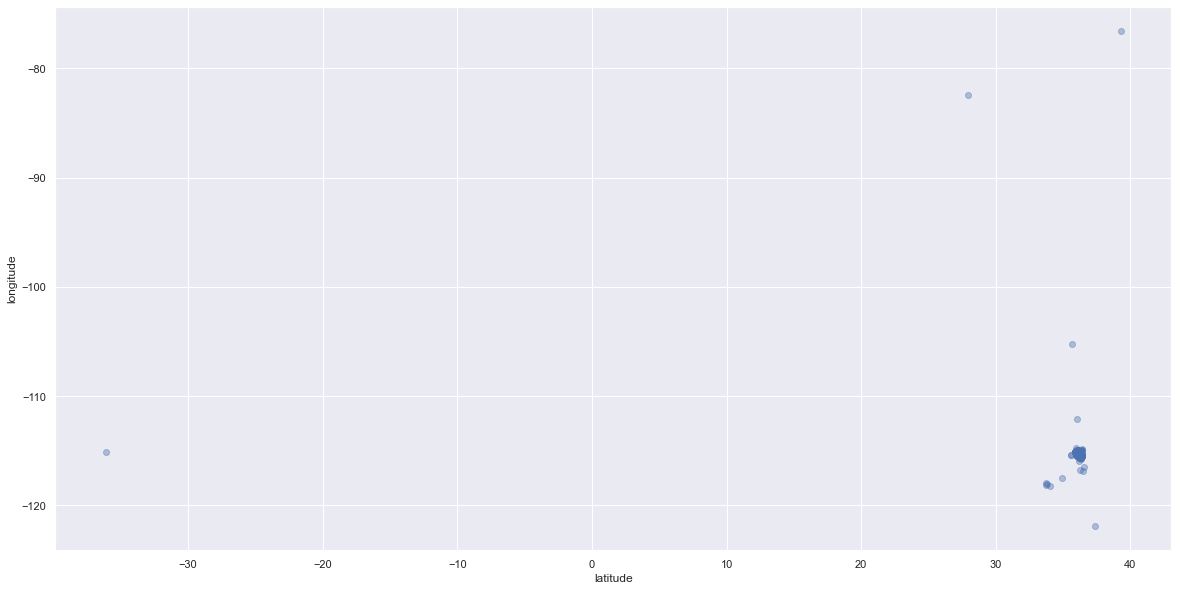

In [51]:
buis_las_veg = yelp_business[yelp_business['city'] == 'Las Vegas']

plt.scatter(buis_las_veg['latitude']
            , buis_las_veg['longitude']
            , alpha=0.4)
plt.xlabel('latitude')
plt.ylabel('longitude')

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком. Попробуйте также для графиков в этой задаче автоматически подгружать карту города в качестве фона графика, используя <a href="https://plotly.com/python/scattermapbox/">примеры</a>.

*Замечание. Если у вас возникает ошибка `Notebook validation failed`, попробуйте открыть ноутбук текстовым редактором и в самом конце заменить `"nbformat_minor": 1` на `"nbformat_minor": 4`.*

Text(0, 0.5, 'longitude')

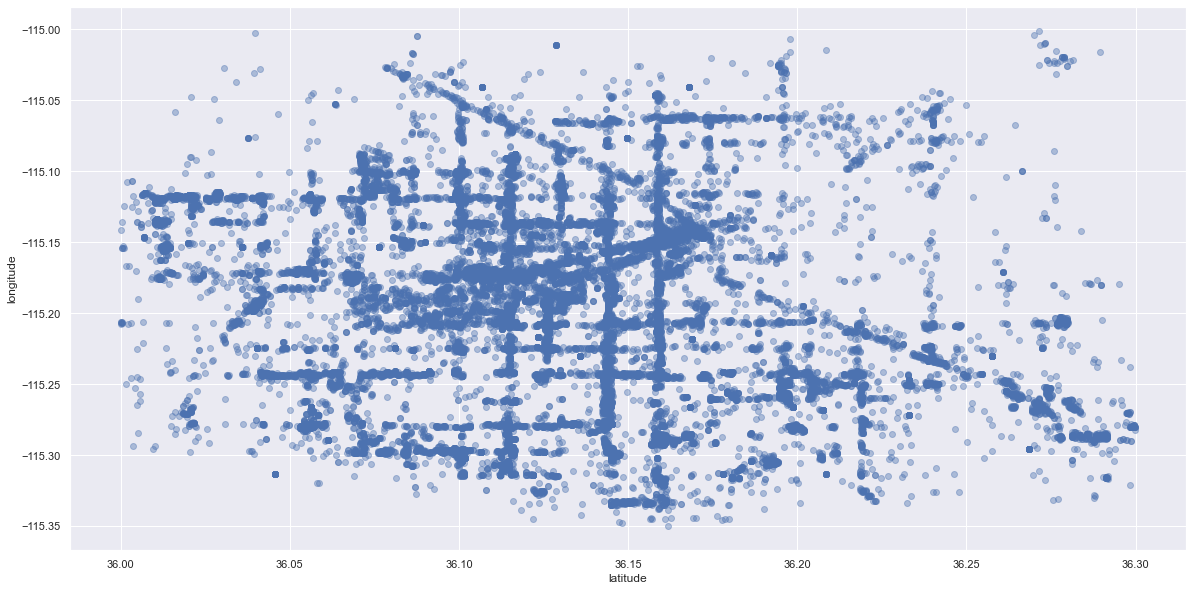

In [52]:
mask = ( (buis_las_veg['latitude'] > 36) & (buis_las_veg['latitude'] < 36.3)
       & (buis_las_veg['longitude'] > -115.35) & (buis_las_veg['longitude'] < -115)
       )

plt.scatter(buis_las_veg[mask]['latitude']
            , buis_las_veg[mask]['longitude']
            , alpha=0.4)
plt.xlabel('latitude')
plt.ylabel('longitude')

In [53]:
import plotly.express as px
import geopandas as gpd

In [54]:
buis_las_veg = buis_las_veg[mask]

In [55]:
px.set_mapbox_access_token(open(".mapbox_token").read())
df = buis_las_veg
df

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude")
fig.show()

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [56]:
yelp_review = pd.read_csv('./data/yelp_review.csv', ',')
yelp_review.head()

Unnamed: 0             business_id  stars
0           0  AEx2SYEUJmTxVVB18LlCwA      5
1           1  VR6GpWIda3SfvPC-lg9H3w      5
2           2  CKC0-MOWMqoeWf6s-szl8g      5
3           3  ACFtxLv8pGrrxMm6EgjreA      4
4           4  s2I_Ni76bjJNK9yG60iD-Q      4

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [57]:
yelp_review.index = yelp_review['business_id']
del yelp_review['business_id']
yelp_review.head()

Unnamed: 0  stars
business_id                              
AEx2SYEUJmTxVVB18LlCwA           0      5
VR6GpWIda3SfvPC-lg9H3w           1      5
CKC0-MOWMqoeWf6s-szl8g           2      5
ACFtxLv8pGrrxMm6EgjreA           3      4
s2I_Ni76bjJNK9yG60iD-Q           4      4

In [58]:
new_buis = pd.merge(buis_las_veg, yelp_review, how='inner', on="business_id")
new_buis.head()

Unnamed: 0_x             business_id          name neighborhood  \
0             6  kCoE3jvEtg6UVz5SOD3GVw  "BDJ Realty"    Summerlin   
1             6  kCoE3jvEtg6UVz5SOD3GVw  "BDJ Realty"    Summerlin   
2             6  kCoE3jvEtg6UVz5SOD3GVw  "BDJ Realty"    Summerlin   
3             6  kCoE3jvEtg6UVz5SOD3GVw  "BDJ Realty"    Summerlin   
4             6  kCoE3jvEtg6UVz5SOD3GVw  "BDJ Realty"    Summerlin   

                      address       city state postal_code  latitude  \
0  "2620 Regatta Dr, Ste 102"  Las Vegas    NV       89128  36.20743   
1  "2620 Regatta Dr, Ste 102"  Las Vegas    NV       89128  36.20743   
2  "2620 Regatta Dr, Ste 102"  Las Vegas    NV       89128  36.20743   
3  "2620 Regatta Dr, Ste 102"  Las Vegas    NV       89128  36.20743   
4  "2620 Regatta Dr, Ste 102"  Las Vegas    NV       89128  36.20743   

   longitude  is_open                                         categories  \
0 -115.26846        1  Real Estate Services;Real Estate;Home Services...   
1 -115.26846        1  Real Estate Services;Real Estate;Home Services...   
2 -115.26846        1  Real Estate Services;Real Estate;Home Services...   
3 -115.26846        1  Real Estate Services;Real Estate;Home Services...   
4 -115.26846        1  Real Estate Services;Real Estate;Home Services...   

   Unnamed: 0_y  stars  
0        456053      4  
1       1093900      1  
2       2039047      5  
3       2979380      5  
4       4844650      5

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [59]:
new_buis.groupby('name').size()

name
"# 1 Nails"                53
"#1 Hawaiian Barbecue"     32
"$10 Tickets"              15
"$2.50 Cleaners"            6
"/usr/lib"                  4
                         ... 
"uBreakiFix Summerlin"     39
"velofix"                   5
"west elm"                 16
"zTailors"                  3
"é by José Andrés"        322
Length: 21400, dtype: int64

In [60]:
new_buis.groupby('name')['stars'].mean().index

Index(['"# 1 Nails"', '"#1 Hawaiian Barbecue"', '"$10 Tickets"',
       '"$2.50 Cleaners"', '"/usr/lib"', '"0 007 Lock 1 Service"',
       '"0 007 Lock1 Service"', '"1 Hr Photo Shack"', '"1 OAK"', '"1 Reef"',
       ...
       '"retroscena"', '"siegel suites"', '"star 5 plumbing"',
       '"tHAIRapy a Salon"', '"trendy wall designs"', '"uBreakiFix Summerlin"',
       '"velofix"', '"west elm"', '"zTailors"', '"é by José Andrés"'],
      dtype='object', name='name', length=21400)

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша.

In [61]:
res_data = pd.DataFrame({"name" : new_buis.groupby('name')['stars'].mean().index
                         , "число оценок" : new_buis.groupby('name').size()
                         , "средняя оценка" : new_buis.groupby('name')['stars'].mean()})
res_data

name  число оценок  средняя оценка
name                                                                        
"# 1 Nails"                        "# 1 Nails"            53        4.132075
"#1 Hawaiian Barbecue"  "#1 Hawaiian Barbecue"            32        3.687500
"$10 Tickets"                    "$10 Tickets"            15        3.933333
"$2.50 Cleaners"              "$2.50 Cleaners"             6        1.666667
"/usr/lib"                          "/usr/lib"             4        4.000000
...                                        ...           ...             ...
"uBreakiFix Summerlin"  "uBreakiFix Summerlin"            39        4.897436
"velofix"                            "velofix"             5        5.000000
"west elm"                          "west elm"            16        3.812500
"zTailors"                          "zTailors"             3        3.000000
"é by José Andrés"          "é by José Andrés"           322        4.503106

[21400 rows x 3 columns]

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

Уже смерджил выше.

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [62]:
...

Ellipsis

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [63]:
...

Ellipsis

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [64]:
...

Ellipsis

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [65]:
...

Ellipsis

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [66]:
...

Ellipsis

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [67]:
...

Ellipsis

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [68]:
...

Ellipsis

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>